In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append('../functions')
from matplotlib import pyplot as plt
import ad_functions as adfns
import pytesseract
import cv2
import numpy as np
import pandas as pd
import os
import shutil

# psm 6 = Assume a single uniform block of text.
config_tesseract = '--tessdata-dir ./ttesseract_langs --psm 6 digits'

In [31]:
file_path = "./manually_cropped/4"
manually_cropped_files = os.listdir(file_path)

In [32]:
manually_cropped_files

['mancrop_01.jpg',
 'mancrop_02.jpg',
 'mancrop_03.jpg',
 'mancrop_04.jpg',
 'mancrop_05.jpg',
 'mancrop_06.jpg',
 'mancrop_07.jpg',
 'mancrop_08.jpg',
 'mancrop_09.jpg',
 'mancrop_10.jpg']

In [24]:
cv2.__version__

'4.2.0'

In [40]:

def display_ten_images(folder_path, title=None):
    """
    Displays ten images from a directory using Matplotlib.

    Args:
        folder_path (str): The path to the directory containing the images.
        title (str, optional): The title to display above the images. Default is None.

    Returns:
        None
    """
    # Get the list of all files in the directory
    filenames = os.listdir(folder_path)
    # Select the first 10 files from the list
    selected_files = filenames[:10]

    # Initialize the figure and axis
    fig, axs = plt.subplots(5, 2, figsize=(10, 12), facecolor="#808080")

    # Iterate through the selected files and plot the image
    for i, f in enumerate(selected_files):
        img = cv2.imread(os.path.join(folder_path, f))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axs[i // 2, i % 2].imshow(img)
        axs[i // 2, i % 2].axis("off")
        axs[i // 2, i % 2].grid(False)
        axs[i // 2, i % 2].set_title(f)

    # Remove the grid lines from the empty subplots
    for ax in axs.flat:
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_facecolor("#808080")
        for sp in ax.spines.values():
            sp.set_visible(False)

    # Set the overall chart title
    fig.suptitle(title, fontsize=20, fontweight=700)

    plt.show()


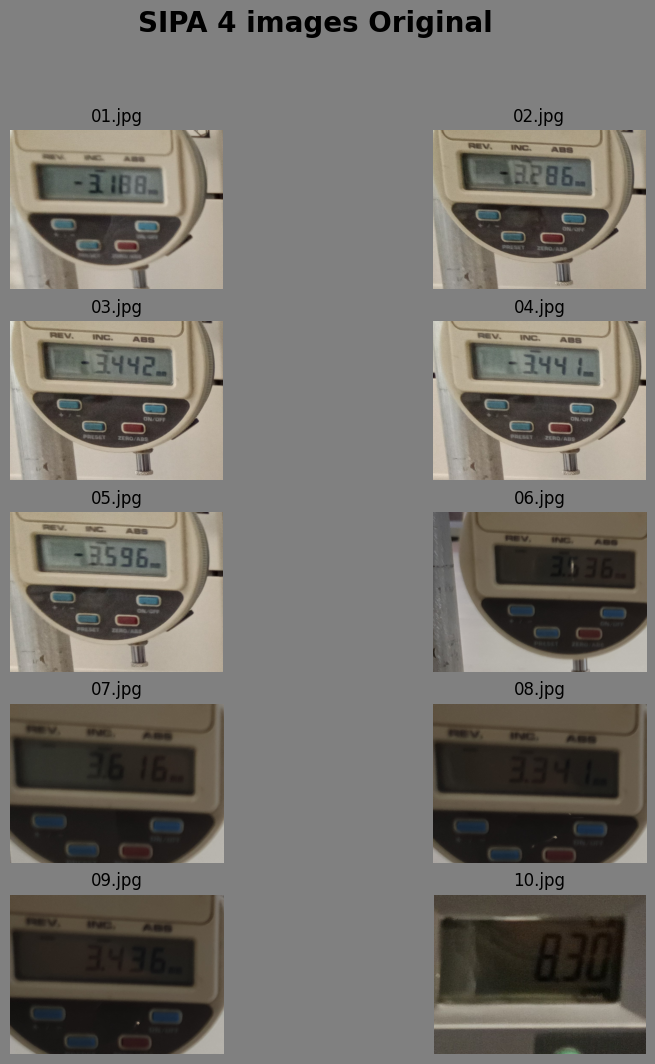

In [45]:
# display_images_in_grid(file_path)


# display_ten_images(file_path, "SIPA 4 images Manually cropped")

display_ten_images("./sipaimages/4/", "SIPA 4 images Original")

10
mancrop_01.jpg


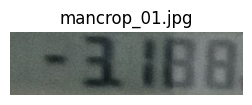

text output is :- ssd :- -3.169
 <--
mancrop_02.jpg


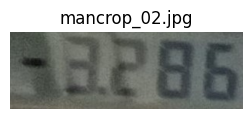

text output is :- ssd :- 43.286
 <--
mancrop_03.jpg


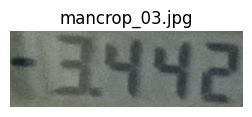

text output is :- ssd :- 3.442
 <--
mancrop_04.jpg


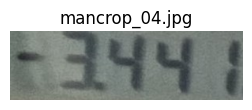

text output is :- ssd :- 73.441
 <--
mancrop_05.jpg


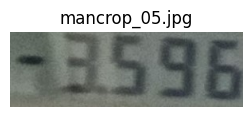

text output is :- ssd :- 73.596
 <--
mancrop_06.jpg


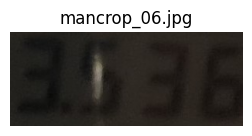

text output is :- ssd :- 1
 <--
mancrop_07.jpg


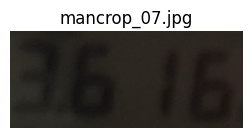

text output is :- ssd :- 3616
 <--
mancrop_08.jpg


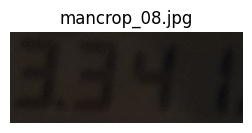

text output is :- ssd :- 0:91 07 594° 8631
8 88656
16 0 0:10
66 7 6:55
1:11 800551
0 86:08
0 111
 <--
mancrop_09.jpg


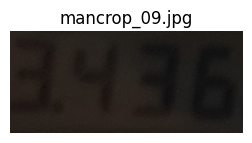

text output is :- ssd :- 3436
 <--
mancrop_10.jpg


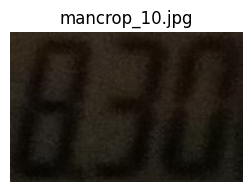

text output is :- ssd :- 830
 <--


In [5]:
print(len(manually_cropped_files))
for filename in manually_cropped_files:
    print(filename)

    image = cv2.imread(file_path + filename)
    # adfns.show_img(image, 3, title=filename)

    # if filename == "mancrop_4.jpg":
    #     image = crop_image(image, top=0, bottom=0, left=0, right=14)
        
    # if filename == "mancrop_13.jpg":
    #     image = crop_image(image, top=0, bottom=0, left=0, right=14)
        
    

    img = adfns.read_resize_data(image, 800) 
    # show_img(image, 3)
    # Pre-processing for tesseract
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 3)
    adfns.show_img(image, 3, title=filename)

    # Run tesseract OCR on the image
    
    text_ssd = pytesseract.image_to_string(image, lang="ssd", config=config_tesseract)
    

    # Print the extracted text
    print("text output is :- ssd :-" , text_ssd,  "<--")

## With Thresh

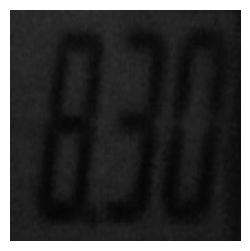

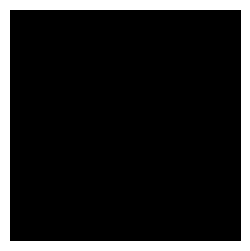

* >>> 10


In [8]:
image = cv2.imread("./manually_cropped/4/mancrop_10.jpg")

# Get image data
# img = read_input_data(input_file)
img = adfns.read_resize_data(image, 105)

# Convert to RGB (three dimensions)
nimRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to gray (one dimension)
nimGray = cv2.cvtColor(nimRGB, cv2.COLOR_BGR2GRAY)

# Set the minimum to gray and max to white
min_threshold = 55
max_threshold = 255

# Binary Thresh
value, nimThresh = cv2.threshold(nimGray, min_threshold, max_threshold, cv2.THRESH_BINARY)

adfns.show_img(nimGray, 3)
adfns.show_img(nimThresh, 3)

# Get Text for Seven Segment and English
text_ssd, text_eng = adfns.get_text(nimGray)

print("* >>>", text_ssd)

# return text_ssd, text_eng


mancrop_01.jpg
* >>> 111111


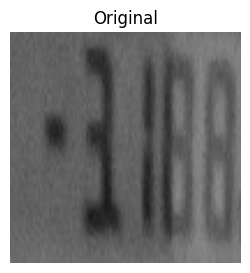

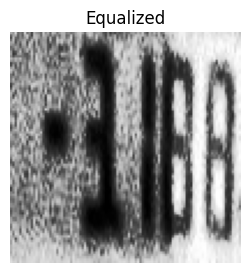

mancrop_02.jpg
* >>> 11010


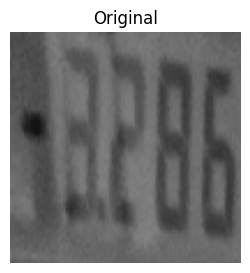

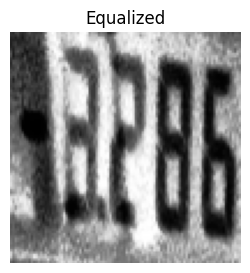

mancrop_03.jpg
* >>> 1111


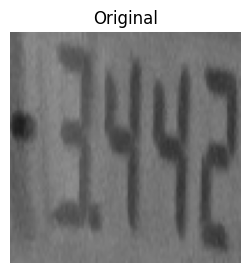

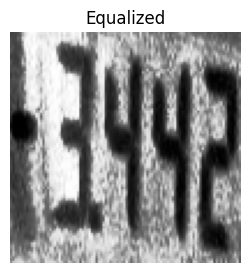

mancrop_04.jpg
* >>> 11111


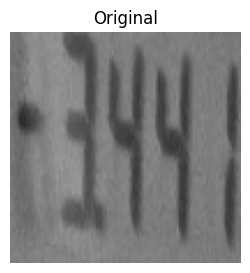

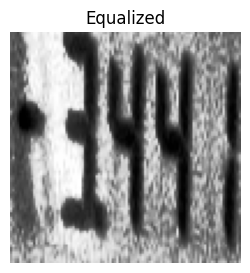

mancrop_05.jpg
* >>> 11


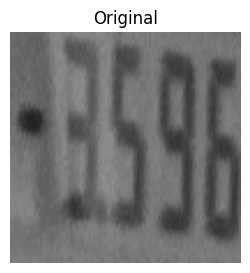

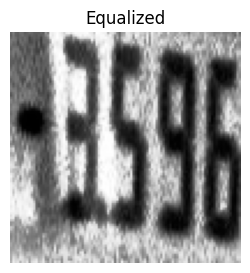

mancrop_06.jpg
* >>> 1


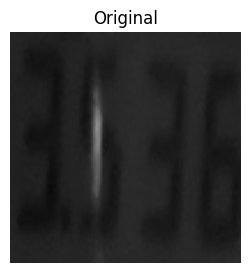

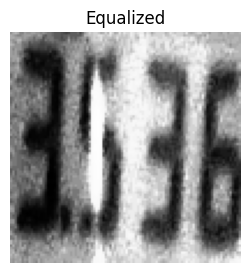

mancrop_07.jpg
* >>> 111


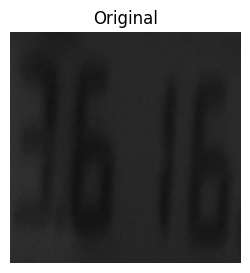

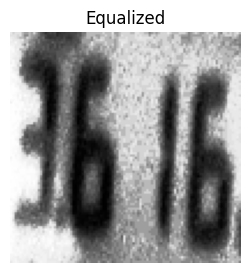

mancrop_08.jpg
* >>> 1111


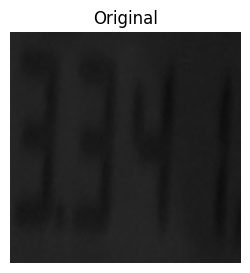

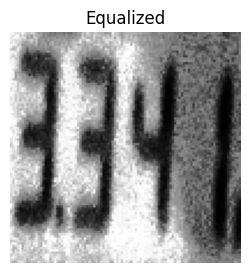

mancrop_09.jpg
* >>> 111


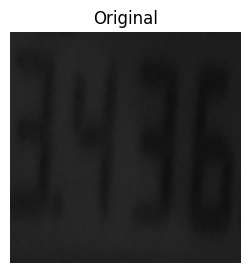

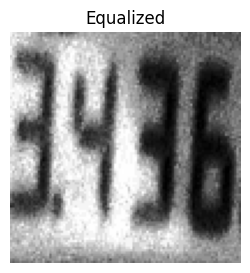

mancrop_10.jpg
* >>> 1811


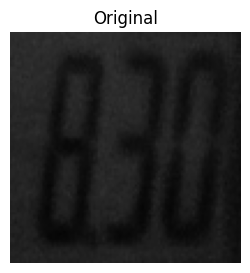

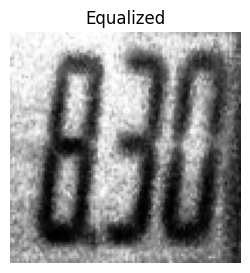

In [13]:
# Image equalization

for filename in manually_cropped_files:
    print(filename)

    img = cv2.imread(file_path + filename, 0)

    img = adfns.read_resize_data(img, 100)

    # Apply histogram equalization
    equalized = cv2.equalizeHist(img)

    text_ssd, text_eng = adfns.get_text(equalized)
    print("* >>>", text_ssd)

    # Display the original and equalized images
    adfns.show_img(img, 3, title="Original")
    adfns.show_img(equalized, 3, title="Equalized")



mancrop_01.jpg


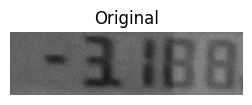

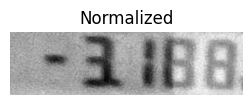

* >>> 3.169
mancrop_02.jpg


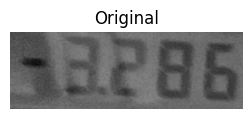

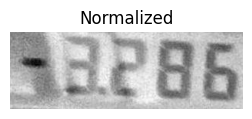

* >>> 43.286
mancrop_03.jpg


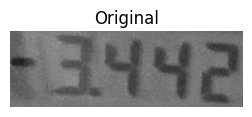

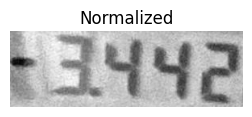

* >>> 3.442
mancrop_04.jpg


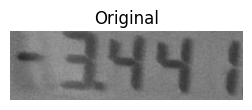

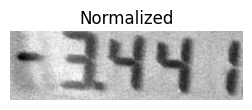

* >>> 73.441
mancrop_05.jpg


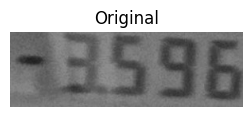

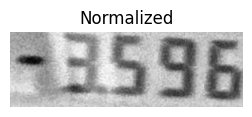

* >>> 73.596
mancrop_06.jpg


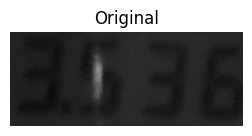

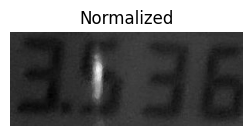

* >>> 1
mancrop_07.jpg


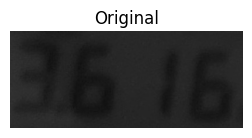

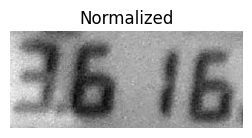

* >>> 3616
mancrop_08.jpg


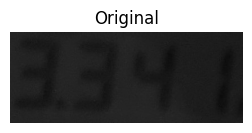

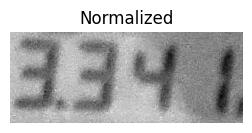

* >>> 000.381082718568880611160651065510
mancrop_09.jpg


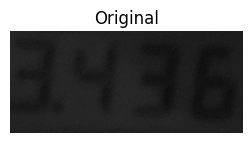

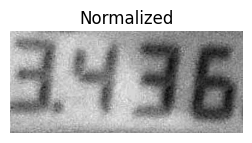

* >>> 5388888713806966891
mancrop_10.jpg


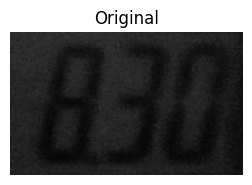

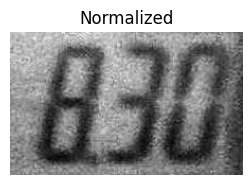

* >>> 


In [14]:
# image normalization

for filename in manually_cropped_files:
    print(filename)

    img = cv2.imread(file_path + filename, 0)

    # Load the image
    # img = cv2.imread("./manually_cropped/4/mancrop_01.jpg", cv2.IMREAD_GRAYSCALE)

    # Normalize the image
    normalized = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

    # Display the original and normalized images
    adfns.show_img(img, 3, title="Original")
    adfns.show_img(normalized, 3, title="Normalized")

    text_ssd, text_eng = adfns.get_text(normalized)

    print("* >>>", text_ssd)



mancrop_01.jpg


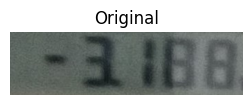

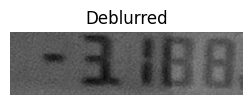

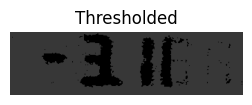

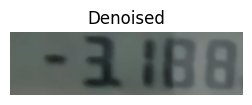

* >>> Original:  3.169
* >>> Deblurred:  3169
* >>> Thresh:  3.106
* >>> Deionised:  3.11
****************************************************
mancrop_02.jpg


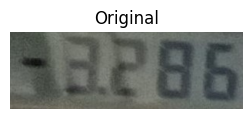

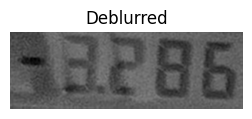

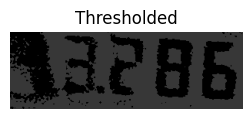

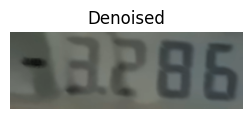

* >>> Original:  43.286
* >>> Deblurred:  793.286
* >>> Thresh:  33.286
* >>> Deionised:  4.3.286
****************************************************
mancrop_03.jpg


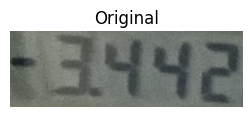

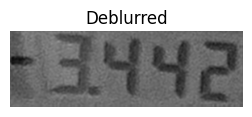

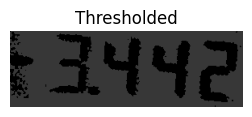

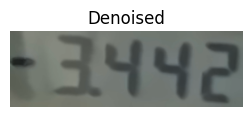

* >>> Original:  3.442
* >>> Deblurred:  3.442
* >>> Thresh:  13.442
* >>> Deionised:  3.442
****************************************************
mancrop_04.jpg


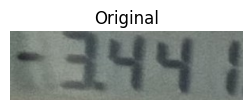

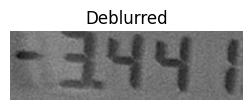

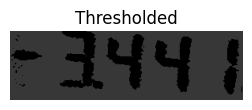

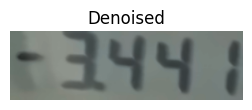

* >>> Original:  73.441
* >>> Deblurred:  3.441
* >>> Thresh:  3.441
* >>> Deionised:  3.441
****************************************************
mancrop_05.jpg


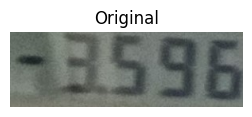

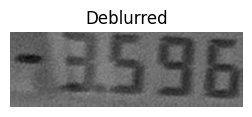

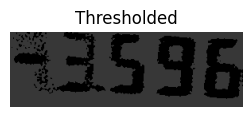

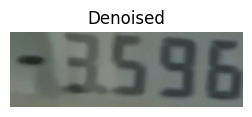

* >>> Original:  73.596
* >>> Deblurred:  73.396
* >>> Thresh:  73.596
* >>> Deionised:  73.596
****************************************************
mancrop_06.jpg


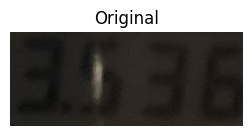

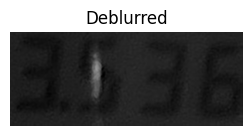

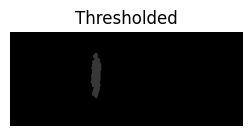

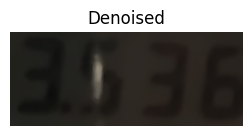

* >>> Original:  1
* >>> Deblurred:  1
* >>> Thresh:  1
* >>> Deionised:  
****************************************************
mancrop_07.jpg


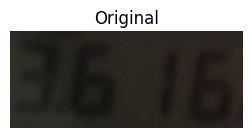

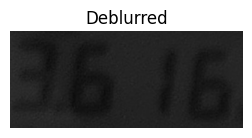

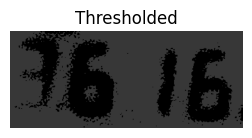

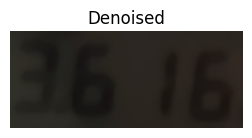

* >>> Original:  3616
* >>> Deblurred:  
* >>> Thresh:  
* >>> Deionised:  1616
****************************************************
mancrop_08.jpg


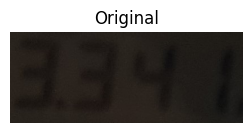

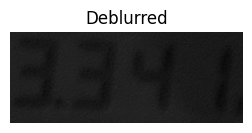

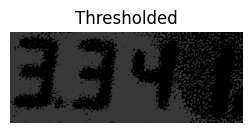

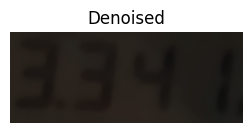

* >>> Original:  091075948631888656160010667655111800551086080111
* >>> Deblurred:  78844225267968852448880245108280804674851167
* >>> Thresh:  7380022490623125025.27131161022611748854635786560068825.2
* >>> Deionised:  3.3411
****************************************************
mancrop_09.jpg


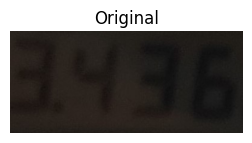

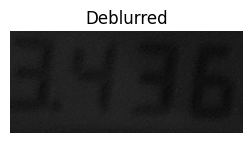

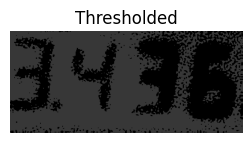

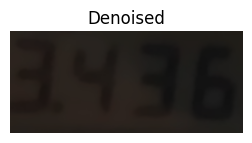

* >>> Original:  3436
* >>> Deblurred:  
* >>> Thresh:  
* >>> Deionised:  3.436
****************************************************
mancrop_10.jpg


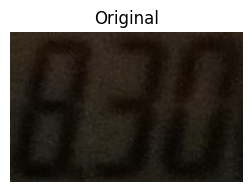

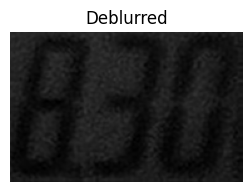

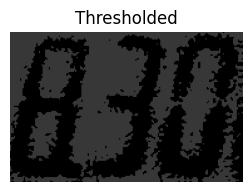

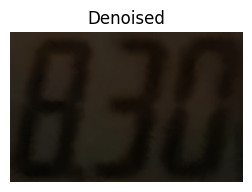

* >>> Original:  830
* >>> Deblurred:  
* >>> Thresh:  
* >>> Deionised:  
****************************************************


In [6]:
# image deblurring

for filename in manually_cropped_files:
    print(filename)

    img = cv2.imread(file_path + filename)

    # Load the image
    # img = cv2.imread("./manually_cropped/4/mancrop_02.jpg")

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Define the blur kernel (e.g., Gaussian blur kernel)
    kernel_size = 5
    kernel = cv2.getGaussianKernel(kernel_size, 0)
    psf = kernel @ kernel.T

    # Define the Wiener filter
    snr = 0.1  # signal-to-noise ratio
    psf /= np.sum(psf)
    otf = np.fft.fft2(psf)
    otf = np.conj(otf) / (np.abs(otf)**2 + snr)
    wiener_filter = np.fft.ifft2(otf)

    # Perform deconvolution using the Wiener filter
    deblurred = cv2.filter2D(gray, -1, wiener_filter.real)

    # Apply thresholding to the deblurred image
    thresh = cv2.threshold(deblurred, 0, 55, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    dst = cv2.fastNlMeansDenoisingColored(img, None, 6, 16, 7, 21)
    denoise_image = adfns.denoise_image(img)

    # Display the original and normalized images
    adfns.show_img(img, 3, title="Original")
    adfns.show_img(deblurred, 3, title="Deblurred")
    adfns.show_img(thresh, 3, title="Thresholded")
    adfns.show_img(dst, 3, title="Denoised")

    text_ssd_original, _  = adfns.get_text(img)
    text_ssd_deblurred, _ = adfns.get_text(deblurred)
    text_ssd_thresh, _    = adfns.get_text(thresh)
    text_ssd_deionised, _ = adfns.get_text(denoise_image)

    print("* >>> Original: ", text_ssd_original)
    print("* >>> Deblurred: ", text_ssd_deblurred)
    print("* >>> Thresh: ", text_ssd_thresh)
    print("* >>> Deionised: ", text_ssd_deionised)
    print("****************************************************")



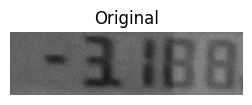

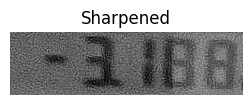

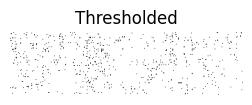

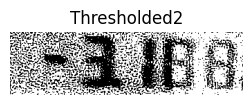

* >>> 0971187752341115


In [82]:
# Create a matrix of ones, then multiply it by a scaler of 100 
# This gives a matrix with same dimesions of our image with all values being 100
M = np.ones(image.shape, dtype = "uint8") * 100 

# Load the image
img = cv2.imread("./manually_cropped/4/mancrop_01.jpg",0)

# Create our shapening kernel, remember it must sum to one 
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])

# applying the sharpening kernel to the image
sharpened = cv2.filter2D(img, 0, kernel_sharpening)

# Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
_, th2 = cv2.threshold(sharpened, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

adfns.show_img(img, 3, title="Original")
adfns.show_img(sharpened, 3, title="Sharpened")
adfns.show_img(thresh, 3, title="Thresholded")
adfns.show_img(th2, 3, title="Thresholded2")


text_ssd, _ = adfns.get_text(sharpened)

print("* >>>", text_ssd)


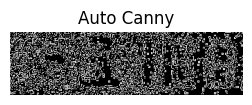

In [84]:
def autoCanny(image):
  # Finds optimal thresholds based on median image pixel intensity
  blurred_img = cv2.blur(image, ksize=(5,5))
  med_val = np.median(image) 
  lower = int(max(0, 0.66 * med_val))
  upper = int(min(255, 1.33 * med_val))
  edges = cv2.Canny(image=image, threshold1=lower, threshold2=upper)
  return edges

auto_canny = autoCanny(th2)
adfns.show_img(auto_canny, 3, title="Auto Canny")


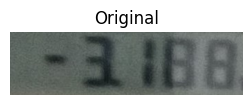

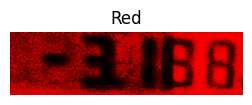

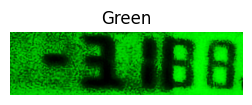

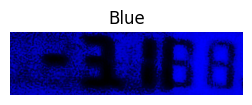

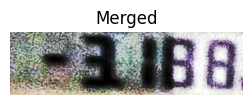

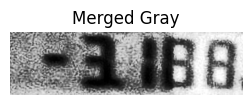

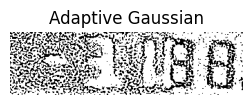

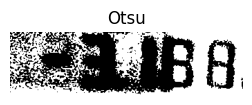

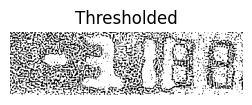

* >>> img 3.169
* >>> red_img 22311189
* >>> green_img 1
* >>> blue_img 274781786706111599431541
* >>> merged 223.1189
* >>> merged_gray 8711141
* >>> merged_adaptive_gaussian 364960076209114111911
* >>> merged_otsu 71411


In [39]:

img = cv2.imread("./manually_cropped/4/mancrop_01.jpg")

adfns.show_img(img, 3, title="Original")

# Equalize our Histogram
# Default color format is BGR 

red_channel = img[:, :, 2]
red = cv2.equalizeHist(red_channel)

green_channel = img[:, :, 1]
green = cv2.equalizeHist(green_channel)

blue_channel = img[:, :, 0]
blue = cv2.equalizeHist(blue_channel)

# create empty image with same shape as that of src image
red_img = np.zeros(img.shape)
red_img[:,:,2] = red
red_img = np.array(red_img, dtype=np.uint8)
adfns.show_img(red_img, 3, title="Red")

green_img = np.zeros(img.shape)
green_img[:,:,1] = green
green_img = np.array(green_img, dtype=np.uint8)
adfns.show_img(green_img, 3, title="Green")

blue_img = np.zeros(img.shape)
blue_img[:,:,0] = blue
blue_img = np.array(blue_img, dtype=np.uint8)
adfns.show_img(blue_img, 3, title="Blue")

merged = cv2.merge([blue, green, red])
adfns.show_img(merged, 3, title="Merged")

merged_gray = cv2.cvtColor(merged, cv2.COLOR_BGR2GRAY)
adfns.show_img(merged_gray, 3, title="Merged Gray")

# merged_otsu = adfns.process_otsu(merged_gray)

# 255 is a value that is going to be assigned to respectively pixels in the result
# (namely, to all pixels which value in the source is greater then computed threshold level)
max_threshold = 255

merged_adaptive_gaussian = cv2.adaptiveThreshold(
    merged_gray, max_threshold, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9
)

adfns.show_img(merged_adaptive_gaussian, 3, title="Adaptive Gaussian")

# 0 means threshold level which actually is omitted because we used CV_THRESH_OTSU flag
min_threshold = 0

# 255 is a value that is going to be assigned to respectively pixels in the result
# (namely, to all pixels which value in the source is greater then computed threshold level)
max_threshold = 255

# THRESH_BINARY | THRESH_OTSU is a required flag to perform Otsu thresholding. Because in fact we would like to perform binary thresholding,
# so we use CV_THRESH_BINARY (you can use any of 5 flags opencv provides) combined with CV_THRESH_OTSU
value, merged_otsu  = cv2.threshold(
    merged_gray, min_threshold, max_threshold, cv2.THRESH_BINARY | cv2.THRESH_OTSU
)

adfns.show_img(merged_otsu, 3, title="Otsu")

thresh = cv2.adaptiveThreshold(merged_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
adfns.show_img(thresh, 3, title="Thresholded")



text_ssd_img, _                      = adfns.get_text(img)
text_ssd_red_img, _                  = adfns.get_text(red_img)
text_ssd_green_img, _                = adfns.get_text(green_img)
text_ssd_blue_img, _                 = adfns.get_text(blue_img)
text_ssd_merged, _                   = adfns.get_text(merged)
text_ssd_merged_gray, _              = adfns.get_text(merged_gray)
text_ssd_merged_adaptive_gaussian, _ = adfns.get_text(merged_adaptive_gaussian)
text_ssd_merged_otsu, _              = adfns.get_text(merged_otsu)


print("* >>> img", text_ssd_img)
print("* >>> red_img", text_ssd_red_img)
print("* >>> green_img", text_ssd_green_img)
print("* >>> blue_img", text_ssd_blue_img)
print("* >>> merged", text_ssd_merged)
print("* >>> merged_gray", text_ssd_merged_gray)
print("* >>> merged_adaptive_gaussian", text_ssd_merged_adaptive_gaussian)
print("* >>> merged_otsu", text_ssd_merged_otsu)

